In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path


import sys
sys.path.insert(0, "/home/estengel/ambiguous_parsing/src/")
from ambiguous_parsing.eval.eval import get_df

In [2]:
CHECKPOINT_DIR= Path("/brtx/602-nvme1/estengel/ambiguous_parsing/logs/1.0/") 
# fol
fol_models_and_paths = []
for model in ["350M", "2B", "6B", "16B"]:
    fol_models_and_paths.extend([("pp", f"codegen-{model}_lamp_no_context_all_pp_fol_0_test_eval_constrained_bs_5_np_full"),
    ("scope", f"codegen-{model}_lamp_no_context_all_scope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("revscope", f"codegen-{model}_lamp_no_context_all_revscope_fol_0_test_eval_constrained_bs_5_np_full"),
    ("bound", f"codegen-{model}_lamp_no_context_all_bound_fol_0_test_eval_constrained_bs_5_np_full"),
    ("conj", f"codegen-{model}_lamp_no_context_all_conj_fol_0_test_eval_constrained_bs_5_np_full")
    ])

# for model in ['7B', '30B']:
# for model in ['7B']:
#     fol_models_and_paths.extend([("pp", f"llama-{model}_lamp_no_context_all_pp_fol_0_test_eval_constrained_bs_5_np_full"),
#     ("scope", f"llama-{model}_lamp_no_context_all_scope_fol_0_test_eval_constrained_bs_5_np_full"),
#     ("revscope", f"llama-{model}_lamp_no_context_all_revscope_fol_0_test_eval_constrained_bs_5_np_full"),
#     ("bound", f"llama-{model}_lamp_no_context_all_bound_fol_0_test_eval_constrained_bs_5_np_full"),
#     ("conj", f"llama-{model}_lamp_no_context_all_conj_fol_0_test_eval_constrained_bs_5_np_full")
#     ])

for model in ["gpt-3.5-turbo"]:
    fol_models_and_paths.extend([("pp", f"{model}_lamp_no_context_all_pp_fol_0_test_eval_unconstrained-api_bs_5_np_full"),
    ("scope", f"{model}_lamp_no_context_all_scope_fol_0_test_eval_unconstrained-api_bs_5_np_full"),
    ("revscope", f"{model}_lamp_no_context_all_revscope_fol_0_test_eval_unconstrained-api_bs_5_np_full"),
    ("bound", f"{model}_lamp_no_context_all_bound_fol_0_test_eval_unconstrained-api_bs_5_np_full"),
    ("conj", f"{model}_lamp_no_context_all_conj_fol_0_test_eval_unconstrained-api_bs_5_np_full")
    ])


In [3]:
big_df = []
for amb_type, path in fol_models_and_paths:
    fol_test_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test.jsonl"
    fol_eval_path = f"/brtx/602-nvme1/estengel/ambiguous_parsing/data/raw/generalization/{amb_type}_fol/test_eval.jsonl"
    pred_path = CHECKPOINT_DIR / path
    try:
        model = path.split("_")[0]
        print(model, amb_type)
        df = get_df(fol_test_path, fol_eval_path, pred_path, is_fol=True)
        df['model'] = model
        df['amb_type'] =  amb_type
        # df['model_order'] = model_order.index(model_name)
        df['is_fol'] = True
        big_df.append(df)
    except (FileNotFoundError, IndexError, AssertionError) as e:
        print(f"Skipping {amb_type}")
        continue

big_df = pd.concat(big_df)

codegen-350M pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-350M scope
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-350M revscope
6 = 3.00 are missing a first output
7 = 3.50 are missing a second output
codegen-350M bound
1 = 0.50 are missing a first output
1 = 0.50 are missing a second output
codegen-350M conj
0 = 0.00 are missing a first output
3 = 1.50 are missing a second output
codegen-2B pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B scope
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B revscope
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B bound
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-2B conj
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codegen-6B pp
0 = 0.00 are missing a first output
0 = 0.00 are missing a second output
codeg

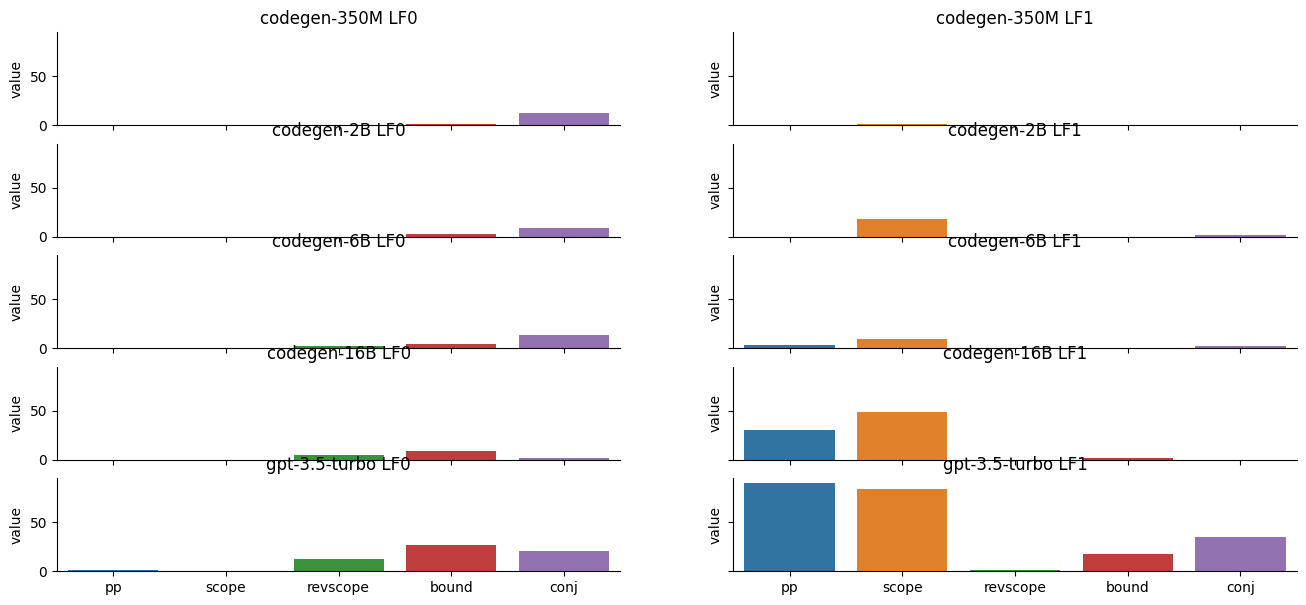

In [4]:


fig, ax = plt.subplots(5, 2, figsize = (16, 7), sharex=True, sharey=True)

for i, model in enumerate(["codegen-350M", "codegen-2B", "codegen-6B", "codegen-16B", "gpt-3.5-turbo"]):
    local_df = big_df[big_df['model'] == model]
    lf1_df = local_df[local_df['key'] == "pred_top_1_matches_lf_0"]
    lf2_df = local_df[local_df['key'] == "pred_top_1_matches_lf_1"]
    sns.barplot(data = lf1_df, x = "amb_type", y = "value", ax = ax[i, 0])
    sns.barplot(data = lf2_df, x = "amb_type", y = "value", ax = ax[i, 1])
    ax[i,0].set_xlabel("")
    ax[i,1].set_xlabel("")
    ax[i,0].set_title(f"{model} LF0")
    ax[i,1].set_title(f"{model} LF1")

sns.despine()

In [5]:
# fig, ax = plt.subplots(5, 2, figsize = (14, 5), sharex=True, sharey=True)

# for i, model in enumerate(["codegen-350M", "codegen-2B", "codegen-6B", "codegen-16B", "llama-7B"]):
#     local_df = big_df[big_df['model'] == model]
#     lf1_df = local_df[local_df['key'] == "lf_0_in_top_k"]
#     lf2_df = local_df[local_df['key'] == "lf_1_in_top_k"]
#     sns.barplot(data = lf1_df, x = "amb_type", y = "value", ax = ax[i, 0])
#     sns.barplot(data = lf2_df, x = "amb_type", y = "value", ax = ax[i, 1])
#     ax[i,0].set_xlabel("")
#     ax[i,1].set_xlabel("")
#     ax[i,0].set_title(f"{model} LF0")
#     ax[i,1].set_title(f"{model} LF1")

# sns.despine()

/tmp/ipykernel_20169/860296395.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lf1_df['model_key'] = lf1_df['model'].apply(lambda x: get_size(x))
/tmp/ipykernel_20169/860296395.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lf2_df['model_key'] = lf2_df['model'].apply(lambda x: get_size(x))
/tmp/ipykernel_20169/860296395.py:52: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(['codegen-350M', 'codegen-2B', 'codegen-6B','codegen-16B', "gpt-3.5"])
/t

Color of pp line is (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
Color of scope line is (1.0, 0.4980392156862745, 0.054901960784313725)
Color of revscope line is (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
Color of bound line is (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
Color of conj line is (0.5803921568627451, 0.403921568627451, 0.7411764705882353)


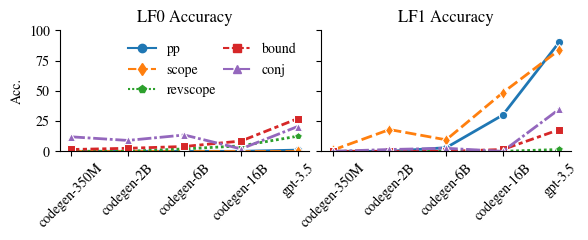

In [32]:
import re
from colors import colors, markers 

plt.rcParams["font.family"] = "Nimbus Roman"

fig, ax = plt.subplots(1, 2, figsize = (6, 2.5), sharex=True, sharey=True)

local_df = big_df
lf1_df = local_df[local_df['key'] == "pred_top_1_matches_lf_0"]
lf2_df = local_df[local_df['key'] == "pred_top_1_matches_lf_1"]
# split model on -

def get_size(key):
    lut = {"text-ada-001": "2.5B", "gpt-3.5-turbo": "100B"}
    if key in lut.keys():
        num = lut[key]
    else:
        num = key.split("-")[1]
    if "M" in num:
        num = float(re.sub("M", "", num)) / 100
    else:
        num = float(re.sub("B", "", num)) * 10
    return num

lf1_df['model_key'] = lf1_df['model'].apply(lambda x: get_size(x))
lf2_df['model_key'] = lf2_df['model'].apply(lambda x: get_size(x))
# sort by model key
lf1_df = lf1_df.sort_values(by=['model_key'])
lf2_df = lf2_df.sort_values(by=['model_key'])
# convert to str 
lf1_df['model_key'] = lf1_df['model_key'].apply(lambda x: str(x))
lf2_df['model_key'] = lf2_df['model_key'].apply(lambda x: str(x))
sns.lineplot(data = lf1_df, 
            x = "model_key", 
            y = "value", 
            hue='amb_type', 
            style='amb_type', 
            markers = markers, 
            palette=colors,
            linewidth=2,
            ax = ax[0]) 
sns.lineplot(data = lf2_df, 
             x = "model_key", 
             y = "value", 
             hue='amb_type', 
             style='amb_type', 
             markers = markers, 
             palette=colors,
             linewidth=2,
             ax = ax[1])
# 
ax[0].set_xticklabels(['codegen-350M', 'codegen-2B', 'codegen-6B','codegen-16B', "gpt-3.5"])


ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_title(f"LF0 Accuracy")
ax[1].set_title(f"LF1 Accuracy")


# rotate ticks
for tick in ax[0].get_xticklabels():
    tick.set_rotation(45)
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)

ax[1].legend().remove()
legend = ax[0].legend(frameon=False, ncol=2, columnspacing=0.5)
ax[0].set_ylim(0, 100)
ax[0].set_yticks([0, 25, 50, 75, 100])
ax[0].set_ylabel("Acc.")

sns.despine()

plt.tight_layout()
plt.subplots_adjust(wspace=0.05)


plt.savefig("/home/estengel/papers/ambiguous-parsing-2023/figures/zero_shot_acc.pdf")

In [ ]:
# turn into a table!